In [1]:
import os
import glob
import pandas as pd
pd.set_option('display.max_colwidth', None)

import math
import json
from collections import Counter, defaultdict

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="pastel")

In [2]:
import platform

# print machine name
machine_name = platform.node().split(".")[0]
print(machine_name)

# print available scratch directories
print(" ".join(os.listdir(f"/{machine_name}")))

DISK_IO_DIR = "/{}/scr1/yiweil".format(machine_name)
print(DISK_IO_DIR)
if not os.path.exists(DISK_IO_DIR):
    os.mkdir(DISK_IO_DIR)

john10
scr1
/john10/scr1/yiweil


# CMV comments

## Load data, link to relevant fields from posts data

In [2]:
posts_df = pd.read_csv('pmaw_output/submissions/changemyview/1-1-2010_to_09-22-2021.csv',
                  index_col=0)
post_id2title = dict(zip(posts_df['id'],posts_df['title']))

In [70]:
posts_df.columns

Index(['author', 'author_created_utc', 'author_flair_css_class',
       'author_flair_text', 'author_fullname', 'created_utc', 'domain',
       'edited', 'full_link', 'gilded', 'id', 'is_self', 'media_embed',
       'num_comments', 'over_18', 'permalink', 'retrieved_on', 'score',
       'secure_media_embed', 'selftext', 'stickied', 'subreddit',
       'subreddit_id', 'thumbnail', 'title', 'url', 'link_flair_css_class',
       'link_flair_text', 'post_hint', 'preview', 'locked', 'banned_by',
       'keyword', 'contest_mode', 'spoiler', 'brand_safe', 'suggested_sort',
       'approved_at_utc', 'banned_at_utc', 'can_mod_post', 'is_video',
       'is_crosspostable', 'is_reddit_media_domain', 'num_crossposts',
       'parent_whitelist_status', 'pinned', 'whitelist_status',
       'thumbnail_height', 'thumbnail_width', 'view_count', 'subreddit_type',
       'author_flair_richtext', 'author_flair_type', 'link_flair_richtext',
       'link_flair_text_color', 'link_flair_type', 'rte_mode',
    

In [31]:
df = pd.read_csv('comments_output/changemyview/from_posts_1-1-2010_to_9-22-2021.csv')
# df['parent_post_title'] = df['parent_id'].apply(
#     lambda x: post_id2title[x.split('_')[-1]]
# )
#df.to_csv('comments_output/changemyview/from_posts_1-1-2010_to_9-22-2021.csv',index=False)
df.shape

(37234, 60)

## Filter to comments on posts w/ keyword in title

In [5]:
with open('../keywords_high_precision.txt','r') as f:
    KEYWORDS_HI_PREC = set(f.read().splitlines())
KEYWORDS_SHORT = set(["climate change","global warming","carbon","co2","methane",
                  "green","environment","fossil fuel"])

In [6]:
KEYWORDS_HI_PREC

{'EPA',
 'IPCC',
 'cap and trade',
 'carbon dioxide',
 'clean energy',
 'climate change',
 'climate crisis',
 'climate emergency',
 'co2',
 'deforestation',
 'environmentalism',
 'extreme weather',
 'fossil fuel',
 'global warming',
 'green new deal',
 'greenhouse effect',
 'greenhouse gas',
 'methane',
 'permafrost',
 'renewable energy',
 'sea level rise'}

In [7]:
import re
def remove_special_chars(s):
    return re.sub('[^A-Za-z]+', ' ', s)

def contains_keyword(s,keyword_set):
    pat = re.compile(r'\b(' + (r'|'.join(keyword_set)) + r')\b')
    #print(set(pat.findall(remove_special_chars(s))).intersection(keyword_set))
    return len(set(pat.findall(s)).intersection(keyword_set)) > 0

In [8]:
contains_keyword('This is a test ot see if $5green new deal appears and EPA.',set(KEYWORDS_HI_PREC))

True

In [9]:
df_small = df.loc[df['parent_post_title'].apply(lambda x: contains_keyword(x,KEYWORDS_HI_PREC))].copy()
df_small.shape

(6403, 60)

## Examine basics

In [59]:
df['author_fullname'].apply(lambda x: type(x)).value_counts() # 429 [deleted]

<class 'str'>      3435
<class 'float'>     931
Name: author_fullname, dtype: int64

In [60]:
df['changed_view'].value_counts()

False    3153
True     1213
Name: changed_view, dtype: int64

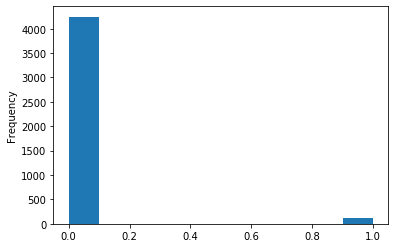

In [61]:
df['controversiality'].plot.hist()

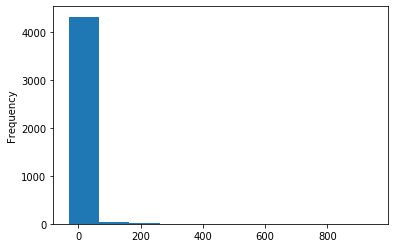

In [62]:
df['ups'].plot.hist()

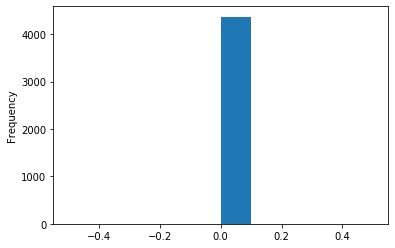

In [63]:
df['downs'].plot.hist()

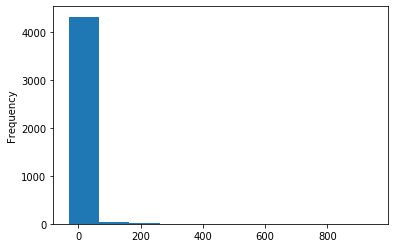

In [64]:
df['score'].plot.hist()

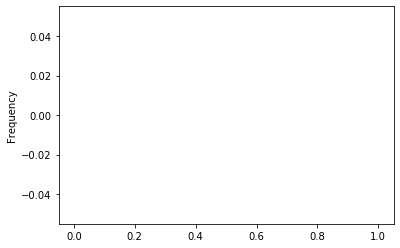

In [65]:
df['likes'].plot.hist()

In [66]:
df['distinguished'].value_counts()

moderator    33
Name: distinguished, dtype: int64

In [67]:
df['is_submitter'].value_counts()

False    4359
True        7
Name: is_submitter, dtype: int64

## Read successful comments in-situ

In [10]:
df.loc[df['changed_view']].shape

(15630, 60)

In [108]:
# for x in df.loc[df['changed_view']]['permalink'].values:
#     print('https://reddit.com'+x)

In [109]:
pd.set_option('display.max_colwidth', None)
df.loc[df['changed_view']][['parent_post_title','body']]

parent_post_title  \
3                                                                                                                                                                                I believe that fracking in the UK is a necessity for the short term and protesters are deluded. CMV   
8                                                                                                                                                                                                                                                I am an 18 year old Republican. CMV   
15                                                                                                                                                                                                         I believe that Global Warming, while real, is not an important issue. CMV   
18    I believe that if you are not an expert in a field, you should form your beliefs based on the consensus and common beliefs of experts in that field. This applies to global warming, GMOs, and even social ideas like institutional oppression, patriarchy and privilege. CMV.   
21    I believe that if you are not an expert in a field, you should form your beliefs based on the consensus and common beliefs of experts in that field. This applies to global warming, GMOs, and even social ideas like institutional oppression, patriarchy and privilege. CMV.   
...                                                                                                                                                                                                                                                                              ...   
8622                                                                                                                                                    CMV: Even if climate change is not real or man-caused, all of the acts being recommended to counter it should happen anyway.   
8626                                                                                                                                                    CMV: Even if climate change is not real or man-caused, all of the acts being recommended to counter it should happen anyway.   
8627                                                                                                                                                    CMV: Even if climate change is not real or man-caused, all of the acts being recommended to counter it should happen anyway.   
8631                                                                                                                                                                                                                     CMV: There's no advantage in living in a developing country   
8636                                                                                                                                                                                                                     CMV: There's no advantage in living in a developing country   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [ ]:
- examples of serious consequences down the road that may not be evident yet
- "serious pollution issues"
- being graphic about ecological devastation
- metaphor of building walls to stop car from falling off cliff rather than to stop 
pushing car
- appealing to (scientific) evidence; "the data"
- equivalency frames with intuitive examples in other domains that are widely accepted
    - e.g. "CMV 'global warming crisis' is deceptive" > 
    "it's like how we call them 'heart attacks'"
- grounding in examples of other policies/actions throughout history 
that have been successful
- grounding in technological developments
- centering on "you"
- counterexamples
- asking questions; turning the tables on them
    - e.g. https://www.reddit.com/r/changemyview/comments/29j84f/cmv_i_fear_that_the_political_left_is_using/cilhoyf/

In [11]:
df_small['full_permalink'] = df_small['permalink'].apply(lambda x: 'https://reddit.com'+x)

In [20]:
df_small.shape

(6403, 61)

In [29]:
# Write data for (dis)agreement prediction
df_small['dummy_label'] = [-1]*len(df_small)
df_small['truncated_text'] = df_small['body'].apply(lambda x: x[:512])
df_small[['id','body','dummy_label']].to_csv('cmv_comments_to_predict.csv',
                               sep=',',header=True,index=False)#head()#.values[:4]

In [177]:
# Write keyword-in-title subset to csv for Nik etc.
df_small.loc[df_small['changed_view']][['parent_post_title','body','full_permalink']].to_csv(
    'successful_cmv_comments.tsv',sep='\t',index=False,header=True
)

## Determine stance of post titles

In [231]:
# Write data for stance classifier; manual labelling
opinions = list(set(list(df_small['parent_post_title'].apply(lambda x: x.replace('\n','').replace('\t','')).values)))
post_title_df = pd.DataFrame(zip(opinions,['neutral']*len(opinions),[1.0]*len(opinions)))
post_title_df.to_csv('cmv_posts_to_stance_classify.tsv',sep='\t',header=False,index=False)
#post_title_df[0].to_csv('cmv_posts_to_manually_classify.tsv',sep='\t',header=False,index=False)

In [232]:
# Compare against classifier and manual predictions
path_to_preds = '/juice/scr/yiweil/GWStance/3_stance_detection/2_Stance_model/\
final_model/no-dev/predictions_test.tsv'
preds_df = pd.read_csv(path_to_preds,sep='\t')
post_title_df['predicted'] = preds_df['predicted'].apply(lambda x: {2: 'pro', 1: 'neutral', 0: 'anti'}[x])

with open('cmv_posts_to_manually_classify.tsv','r') as f:
    manual_lines = f.read().splitlines()
manual_labels = []
for ix,line in enumerate(manual_lines):
    split_line = line.split(',')
    label = split_line[-1]
    if label in {'a','n','?','p','pa','ps'}:
        manual_labels.append(label)
    else:
        manual_labels.append(-1)
post_title_df['manual_label'] = manual_labels

print('====== Classifier label distribution ======')
print(post_title_df['predicted'].value_counts())
print('\n')
print('====== Manual label distribution ======')
print(post_title_df['manual_label'].value_counts())
print('\n')

post_title_df[[0, 'predicted','manual_label']].to_csv('cmv_posts_with_classifier_and_manual_labels.csv',
                                                      sep='\t',index=False)

====== Classifier label distribution ======
pro        279
neutral    144
anti       106
Name: predicted, dtype: int64


====== Manual label distribution ======
-1    389
ps     52
n      30
p      20
a      19
pa     17
?       2
Name: manual_label, dtype: int64




In [3]:
post_title_df = pd.read_csv('cmv_posts_with_classifier_and_manual_labels.csv',
                                                      sep='\t')

In [4]:
post_title_df['manual_label_macro'] = post_title_df['manual_label'].apply(lambda x: x[0] if type(x) == str 
                                                                         and x != '?' else x)
post_title_df['manual_label_macro'] = post_title_df['manual_label_macro'].apply(lambda x: {'p':'pro',
                                                                                          'a':'anti',
                                                                                          'n':'neutral'}[x]
                                                                               if x in {'p','a','n'}
                                                                               else x)

In [5]:
post_title_df['manual_label_macro'].value_counts()

-          389
pro         89
neutral     30
anti        19
?            2
Name: manual_label_macro, dtype: int64

In [247]:
denom = 89+30+19
print(89/denom)
print(30/denom)
print(19/denom)

0.644927536231884
0.21739130434782608
0.13768115942028986


In [10]:
post_title_df.loc[post_title_df['manual_label']=='p'][['0','predicted']].\
    style.set_table_attributes('style="font-size: 20px"')

,0,predicted
0,CMV: High immigration rates to the US and other industrialized nations is contributing to global warming,pro
11,CMV:Humans causing global warming is essentially mass suicide,pro
14,"CMV: focus should be on dealing with climate change, not stopping it",pro
26,CMV: I think climate change will kill us in the next several decades.,pro
31,"CMV: Due to global warming, societal collapse within a young person's lifetime is already inevitable, as well as human extinction in the long term.",pro
42,"CMV: I'm scared, because of climate change.",pro
52,CMV: It's possible that climate change is caused by humans and we should invest heavily in green energy to fight it.,pro
56,CMV: The most ethical course of action is to take very drastic measures to stop climate change,pro
450,CMV: Human caused climate change is real and requires immediate action to reduce its impact.,pro
455,"CMV: Human civilization is not going to last much longer, due to climate change and related crises",pro


In [7]:
post_title_df.loc[post_title_df['manual_label']=='ps'][['0','predicted']]\
    .style.set_table_attributes('style="font-size: 20px"')

,0,predicted
3,"CMV: With the climate crisis, I deserve to feel guilty about owning a car.",pro
6,"CMV: We can end world hunger, slow down global warming and increase the health of humans by resorting to conditional cannibalism",pro
10,"CMV: Climate change activists (any entity that officially acknowledges and actively aims to inform/mitigate its effects) don't take climate change seriously enough. So we can't expect average people to react seriously as well. Basically, Greta is bad climate mascot",anti
18,"CMV: Urban density won’t fix climate change. If anything, it’s exacerbating climate change for profit while pretending to care about the issue.",anti
20,CMV: Non-electric vehicles should be banned until global warming is resolved (U.S specifically),pro
21,CMV: People that do not believe in climate change should not be allowed to hold public office,neutral
25,CMV: Global climate change will adversely affect the tourism industry.,pro
27,CMV: We should be taking more action preventing climate change than we should COVID-19,pro
28,CMV: the only paths to a sustainable future that avoid catastrophic climate change include the industrialized world eating a lot less meat,pro
32,"CMV: People who say ""overpopulation is a myth"" deserve to be treated the same as flat-earthers, anti-vaxxers, Holocaust deniers, and climate change deniers.",anti


In [8]:
post_title_df.loc[post_title_df['manual_label']=='pa'][['0','predicted']]\
    .style.set_table_attributes('style="font-size: 20px"')

,0,predicted
1,CMV: the fight against climate change will be impossible because of compromises.,pro
13,CMV: Most of humanity is doomed due to climate change and its associated issues.,pro
16,CMV: Every proposed solution to climate change has been a complete waste of time,pro
19,CMV: Why focus so much on climate change? Global warming is next to impossible to reverse.,pro
36,CMV: It's too late to do anything about climate change.,neutral
39,CMV: Humans can't stop climate change,pro
50,CMV: Mitigating climate change goes against human nature,pro
51,CMV: You cannot reverse climate change.,pro
53,"CMV: As long as Conservatives maintain any significant level of federal power, meaningful action to curb climate change is impossible in the US",neutral
454,"CMV: With our current technology, politics, and pace of economic growth, I don't think ""unrecognizable"" climate change can be stopped",pro


In [9]:
post_title_df.loc[post_title_df['manual_label']=='n'][['0','predicted']]\
    .style.set_table_attributes('style="font-size: 20px"')

,0,predicted
5,"CMV: Pressuring developing nations to shift away from fossil fuel is not constructive, we should be pressuring developed nations to build FREE green tech in developing nations.",neutral
7,CMV: Nuclear power should be widely adopted until/unless renewable energy sources can catch up,neutral
8,"CMV: Even if climate change is not real or man-caused, all of the acts being recommended to counter it should happen anyway.",anti
9,"CMV: Elizabeth Warren wants to destroy the US economy and rip jobs away from many Americans. She said in a September tweet that she would put a ""total moratorium on all new fossil fuel leases for drilling offshore and on public lands,"" and that she would ban fracking everywhere.",neutral
12,CMV: The EPA should be combined with the CDC and renamed the Public Health Protection Agency,neutral
17,"CMV: the potential disappearance of polar bears, caused by global warming, would have zero effect on my life.",pro
24,CMV: Conservatives don't deny the existence of climate change. They just dont think it's caused by humans.,neutral
29,CMV Religious people have no right to disagree with climate change in the same way that atheists should not argue religion with people who hold those beliefs.,anti
30,"CMV: Human population reaching Earth's maximum carrying capacity is a far more pressing, serious concern than climate change.",pro
35,"CMV: Even if climate change is indeed ""a hoax,"" we still benefit greatly from addressing the problem by moving to renewable energy and sustainable resources",pro


## LOR comments receiving delta vs. not ""

In [15]:
# spaCy preprocessing of body
# import spacy
# nlp = spacy.load("en_core_web_sm")

# save each comment's output as 
# `'comments_output/changemyview/spacy_processed/{}.json'.format(comment_id)`
# save_dir = os.path.join('comments_output','changemyview','spacy_processed')
# if not os.path.exists(save_dir):
#     os.makedirs(save_dir)

In [133]:
processed = set(glob.glob(os.path.join(save_dir,'*.json')))
print(len(processed))

# for ix_row,row in df.iterrows():
#     c_id = row['id']
#     save_file = '{}.json'.format(c_id)
#     if os.path.join(save_dir,save_file) not in processed:
#         text = row['body']
#         if type(text) == str:
#             json_out = defaultdict(list)
#             doc = nlp(text)
#             for token in doc:
#                 json_out['token'].append(token.text)
#                 json_out['lemma'].append(token.lemma_)
#                 json_out['pos'].append(token.pos_)
#                 json_out['dep'].append(token.dep_)
#                 json_out['head'].append(token.head.text)
#                 json_out['children'].append([child.text for child in token.children])

#             with open(os.path.join(save_dir,save_file), 'w') as outfile:
#                 json.dump(json_out, outfile)
            
#     if ix_row % 500 == 0:
#         print(ix_row)

37233


In [13]:
# group into 2 sets:
# words in comments receiving deltas; words in comments NOT ""

df['changed_view'].value_counts()

False    21604
True     15630
Name: changed_view, dtype: int64

In [16]:
#b_change, b_no_change, prior_lemmas = [], [], []

for c_id in df.loc[df['changed_view']]['id'].values:
    try:
        json_obj = pd.read_json(os.path.join(save_dir,'{}.json'.format(c_id)))
        lemmas = json_obj['lemma'].values
        b_change.extend(lemmas)
    except ValueError:
        continue
    
    
for c_id in df.loc[~df['changed_view']]['id'].values:
    try:
        json_obj = pd.read_json(os.path.join(save_dir,'{}.json'.format(c_id)))
        lemmas = json_obj['lemma'].values
        b_no_change.extend(lemmas)
    except ValueError:
        continue
        
for fname in glob.glob('/john11/scr1/yiweil/pushshift_output/pushshift_output_background/spacy_processed/'+\
                      '*.json'):
    try:
        json_obj = pd.read_json(fname)
        lemmas = json_obj['lemma'].values
        prior_lemmas.extend(lemmas)
    except ValueError:
        continue
    
print(len(b_change),len(b_no_change),len(prior_lemmas))

2880822 3242926 11953043


In [18]:
b_change = [x for x in b_change if x.isalpha()]
b_no_change = [x for x in b_no_change if x.isalpha()]
prior_lemmas = [x for x in prior_lemmas if x.isalpha()]

In [19]:
counts_change, counts_no_change, counts_prior = Counter(b_change), Counter(b_no_change), \
                                                    Counter(prior_lemmas)
print(len(counts_change), len(counts_no_change), len(counts_prior))

#prior = counts_change + counts_no_change + counts_prior

sigmasquared = defaultdict(float)
sigma = defaultdict(float)
delta = defaultdict(float)

for word in counts_prior.keys():
    counts_prior[word] = int(counts_prior[word] + 0.5)

for word in counts_no_change.keys():
    counts_change[word] = int(counts_change[word] + 0.5)
    if counts_prior[word] == 0:
        counts_prior[word] = 1

for word in counts_change.keys():
    counts_no_change[word] = int(counts_no_change[word] + 0.5)
    if counts_prior[word] == 0:
        counts_prior[word] = 1

n1  = sum(counts_change.values())
n2  = sum(counts_no_change.values())
nprior = sum(counts_prior.values())

for word in counts_prior.keys():
    if counts_prior[word] > 0:
        l1 = float(counts_change[word] + counts_prior[word]) /\
                  (( n1 + nprior ) - (counts_change[word] + counts_prior[word]))
        l2 = float(counts_no_change[word] + counts_prior[word]) /\
                  (( n2 + nprior ) - (counts_no_change[word] + counts_prior[word]))
        sigmasquared[word] =  1/(float(counts_change[word]) + float(counts_prior[word])) + \
                              1/(float(counts_no_change[word]) + float(counts_prior[word]))
        sigma[word] =  math.sqrt(sigmasquared[word])
        delta[word] = ( math.log(l1) - math.log(l2) ) / sigma[word]

for word in sorted(delta, key=delta.get):
    if abs(delta[word]) >= 1.96:
        print(word)
        print("%.3f" % delta[word])

32484 36562 71529
delete
-11.602
XXXXXX
-7.763
XXXXXXX
-6.964
XX
-6.861
XXXXXXXX
-6.712
America
-6.597
remove
-6.555
XXXXXXXXXXX
-6.529
Trump
-6.445
Hillary
-6.252
bag
-6.233
XXXXXXXXXXXX
-6.200
XXXXXXXXXX
-5.987
XXXX
-5.970
XXXXXXXXX
-5.730
XXXXXXXXXXXXX
-5.726
XXX
-5.695
Clinton
-5.653
TED
-5.462
energy
-5.459
fusion
-5.381
XXXXX
-5.365
liberal
-5.354
STEM
-5.183
supporter
-5.161
XXXXXXXXXXXXXX
-5.158
XXXXXXXXXXXXXXXX
-5.067
country
-4.989
vote
-4.981
scientist
-4.949
trump
-4.941
world
-4.908
X
-4.846
waste
-4.813
nuclear
-4.728
XXXXXXXXXXXXXXX
-4.709
XXXXXXXXXXXXXXXXX
-4.530
radioactive
-4.426
XXXXXXXXXXXXXXXXXX
-4.425
and
-4.347
warming
-4.272
warm
-4.271
earth
-4.268
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
-4.243
NYC
-4.227
Histogram
-4.128
think
-4.101
the
-4.089
Party
-4.086
global
-4.019
debate
-4.016
XXXXXXXXXXXXXXXXXXXXXXX
-3.957
huadpe
-3.915
fission
-3.890
planet
-3.885
XXXXXXXXXXXXXXXXXXXX
-3.881
uranium
-3.866
Floyd
-3.805
will
-3.797
XXXXXXXXXXXXXXX

In [52]:
for word in sorted(delta, key=delta.get):
    if abs(delta[word]) >= 1.96 and word not in CMV_META_TERMS:
        print(word)
        print("%.3f" % delta[word])

delete
-11.602
XXXXXX
-7.763
XXXXXXX
-6.964
XX
-6.861
XXXXXXXX
-6.712
America
-6.597
remove
-6.555
XXXXXXXXXXX
-6.529
Trump
-6.445
Hillary
-6.252
bag
-6.233
XXXXXXXXXXXX
-6.200
XXXXXXXXXX
-5.987
XXXX
-5.970
XXXXXXXXX
-5.730
XXXXXXXXXXXXX
-5.726
XXX
-5.695
Clinton
-5.653
TED
-5.462
energy
-5.459
fusion
-5.381
XXXXX
-5.365
liberal
-5.354
STEM
-5.183
supporter
-5.161
XXXXXXXXXXXXXX
-5.158
XXXXXXXXXXXXXXXX
-5.067
country
-4.989
vote
-4.981
scientist
-4.949
trump
-4.941
world
-4.908
X
-4.846
waste
-4.813
nuclear
-4.728
XXXXXXXXXXXXXXX
-4.709
XXXXXXXXXXXXXXXXX
-4.530
radioactive
-4.426
XXXXXXXXXXXXXXXXXX
-4.425
and
-4.347
warming
-4.272
warm
-4.271
earth
-4.268
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
-4.243
NYC
-4.227
Histogram
-4.128
think
-4.101
the
-4.089
Party
-4.086
global
-4.019
debate
-4.016
XXXXXXXXXXXXXXXXXXXXXXX
-3.957
huadpe
-3.915
fission
-3.890
planet
-3.885
XXXXXXXXXXXXXXXXXXXX
-3.881
uranium
-3.866
Floyd
-3.805
will
-3.797
XXXXXXXXXXXXXXXXXXX
-3.791
RustyR

In [55]:
pd.DataFrame({
    'word':[w for w in sorted(delta, key=delta.get)],
    'delta':[delta[w] for w in sorted(delta, key=delta.get)]
}).head(20)

,word,delta
0,delete,-11.601615
1,XXXXXX,-7.762614
2,XXXXXXX,-6.963522
3,XX,-6.860528
4,XXXXXXXX,-6.712207
5,America,-6.597025
6,remove,-6.555171
7,XXXXXXXXXXX,-6.528502
8,Trump,-6.445034
9,Hillary,-6.251534


In [57]:
pd.DataFrame({
    'word':[w for w in sorted(delta, key=delta.get)],
    'delta':[delta[w] for w in sorted(delta, key=delta.get)]
}).tail(40)

,word,delta
87084,within,5.384430
87085,multiple,5.562481
87086,view,5.691468
87087,sorry,5.811272
87088,substantially,5.865499
87089,end,5.909426
87090,indicator,6.072206
87091,reply,6.152504
87092,mean,6.174761
87093,or,6.471736


In [50]:
CMV_META_TERMS = {'wiki','delta','op','changemyview','award','r','DeltaLog','System',
                 'reversal','user','comment','list','conversation','note','earn','modstandard',
                 'u','post','moderation','OP','violation','message','click','deltaboard',
                 'deltasystem','reply','indicator'}

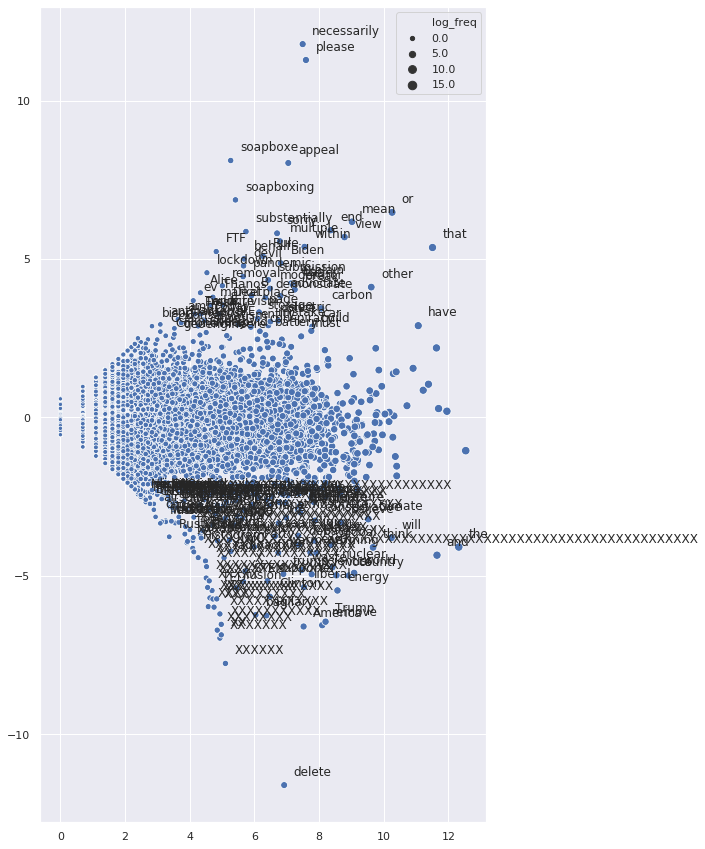

In [51]:
# Make plot
all_counts = counts_change + counts_no_change
to_plot_df = pd.DataFrame({
    'lor': [delta[w] for w in all_counts if w not in CMV_META_TERMS],
    'word': [w for w in all_counts if w not in CMV_META_TERMS],
    'log_freq': [math.log(all_counts[w]) for w in all_counts if w not in CMV_META_TERMS]
})

plt.figure(figsize = (8,15))
kws = {"color" : ["black" if abs(delta[w]) >= 1.96 else "gray" for w in all_counts if w not in CMV_META_TERMS],
      "size": [math.log(all_counts[w]) for w in all_counts if w not in CMV_META_TERMS]}
sns.scatterplot(y=to_plot_df['lor'].values,x=to_plot_df['log_freq'].values,size="log_freq",data=to_plot_df)
for _,row in to_plot_df.iterrows():
    if abs(row['lor']) >= 2.5:
        plt.text(x=row['log_freq']+0.3,
                 y=row['lor']+0.3,
                 s=row['word']),
             #fontdict=dict(color=’red’,size=10),
             #bbox=dict(facecolor=’yellow’,alpha=0.5))

In [ ]:
# explain
# demonstrate
# advocate
# carbon
# mistake
# must
# conspiracy
# activism
# review, report
# new
# Deal
# democratic, Democrats
# wildfire


In [ ]:
# scientist
# answer
# know
# agree, agreement, disagree
# think
# opinion
# America, U.S., USA, american
# stupid, crazy
# extremist
# degree
# correct
# earth